### Lab

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

In [2]:
wage = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/wage.csv")
wage.head()

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
X= wage[['age']]
Y= wage['wage']

poly = PolynomialFeatures(degree = 4, include_bias = False)
model = LinearRegression()

In [5]:
model.fit(poly.fit_transform(X), Y)

LinearRegression()

In [6]:
type(Y)

pandas.core.series.Series

In [7]:
model.intercept_, model.coef_

(-184.15417977415927,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

###### Sklearn models don't provide you with std.errors. Have to be manually calculated. Use statsmodels to get std errors


In [8]:
import statsmodels.formula.api as smf

result =smf.ols('wage~age + np.power(age,2) + np.power(age,3) + np.power(age,4)', data = wage).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           2.77e-57
Time:                        11:53:55   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
result.bse

Intercept           60.040377
age                  5.886748
np.power(age, 2)     0.206108
np.power(age, 3)     0.003066
np.power(age, 4)     0.000016
dtype: float64

In [10]:
result.conf_int()

,0,1
Intercept,-301.878732,-6.642963e+01
age,9.703041,3.278800e+01
"np.power(age, 2)",-0.967987,-1.597312e-01
"np.power(age, 3)",0.000799,1.282223e-02
"np.power(age, 4)",-0.000064,1.447431e-07


In [11]:
result.params

Intercept          -184.154180
age                  21.245521
np.power(age, 2)     -0.563859
np.power(age, 3)      0.006811
np.power(age, 4)     -0.000032
dtype: float64

In [12]:
from statsmodels.stats.outliers_influence import summary_table

In [13]:
st, data, ss2 = summary_table(result, alpha = 0.05)

In [14]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,75.0431540173515,51.9314503464995,5.298268259999714,41.54283707129963,62.320063621699376,-27.01819789903233,130.88109859203132,23.111703670851995,39.561577570051305,0.5841957042771695,0.0012242423488253362
2.0,70.47601964694451,84.47675569284795,1.8256760577243945,80.89704972124218,88.0564616644537,6.131762442992041,162.82174894270383,-14.000736045903437,39.8730105875937,-0.3511331559764314,5.169672839252311e-05
3.0,130.982177377461,119.32598491379542,1.1077290294609623,117.15399815584612,121.49797167174472,41.03268252501958,197.61928730257125,11.656192463665576,39.899411058102054,0.29213946157480053,1.3156626578144232e-05
4.0,154.68529299563,118.79209741189209,1.0819388704189046,116.67067887273545,120.91351595104872,40.500181551527305,197.08401327225687,35.893195583737906,39.90011872998355,0.8995761598264476,0.00011900437892575242
5.0,75.0431540173515,119.57013130658049,1.1303626968604035,117.35376544095418,121.78649717220681,41.27558519949514,197.86467741366585,-44.526977289228995,39.89877625391102,-1.1159985711307199,0.00019992806170099155
6.0,127.115743812184,118.90481287258967,1.2314154637612817,116.49030714989954,121.31931859527981,40.60440731576257,197.2052184294168,8.21093093959432,39.895785270398136,0.20580948298031534,8.070787813980023e-06
7.0,169.528538036679,119.0960786717759,1.0958087818989843,116.9474646152432,121.24469272830859,40.80342119465706,197.38873614889474,50.43245936490311,39.89974021844779,1.2639796421928953,0.0002410125019244951
8.0,111.720849360989,103.67559716445516,1.4137687972788975,100.9035409802944,106.44765334861592,25.363350561509407,181.9878437674009,8.045252196533852,39.88973958518591,0.20168725793140213,1.0219303588352226e-05
9.0,118.884359339886,117.93147637056023,1.056899425171913,115.85915408333564,120.00379865778483,39.64087545233406,196.2220772887864,0.9528829693257705,39.90078984169585,0.023881305936706527,8.002956903978149e-08


In [15]:
data

array([[ 1.00000000e+00,  7.50431540e+01,  5.19314503e+01, ...,
         3.95615776e+01,  5.84195704e-01,  1.22424235e-03],
       [ 2.00000000e+00,  7.04760196e+01,  8.44767557e+01, ...,
         3.98730106e+01, -3.51133156e-01,  5.16967284e-05],
       [ 3.00000000e+00,  1.30982177e+02,  1.19325985e+02, ...,
         3.98994111e+01,  2.92139462e-01,  1.31566266e-05],
       ...,
       [ 2.99800000e+03,  6.62294083e+01,  9.54497339e+01, ...,
         3.98861168e+01, -7.32593893e-01,  1.54355720e-04],
       [ 2.99900000e+03,  8.79810328e+01,  9.54497339e+01, ...,
         3.98861168e+01, -1.87250645e-01,  1.00842309e-05],
       [ 3.00000000e+03,  9.04819134e+01,  1.18632694e+02, ...,
         3.98938161e+01, -7.05642719e-01,  1.04716497e-04]])

In [16]:
ss2

['Obs',
 'Dep Var\nPopulation',
 'Predicted\nValue',
 'Std Error\nMean Predict',
 'Mean ci\n95% low',
 'Mean ci\n95% upp',
 'Predict ci\n95% low',
 'Predict ci\n95% upp',
 'Residual',
 'Std Error\nResidual',
 'Student\nResidual',
 "Cook's\nD"]

In [17]:
fitted_values = data[:,2]
type(fitted_values)

numpy.ndarray

In [18]:
predict_mean_se = data[:,3]
predict_mean_ci_low, predict_mean_ci_up = data [:, 4:6].T

In [19]:
data [:, 4:6].T

array([[ 41.54283707,  80.89704972, 117.15399816, ...,  92.48402535,
         92.48402535, 116.09618232],
       [ 62.32006362,  88.05646166, 121.49797167, ...,  98.41544238,
         98.41544238, 121.16920616]])

In [20]:
order = np.argsort(X.values.flatten())
x_o = X.values.flatten()[order]
x_o

array([18, 18, 18, ..., 80, 80, 80])

In [21]:
import matplotlib.pyplot as plt

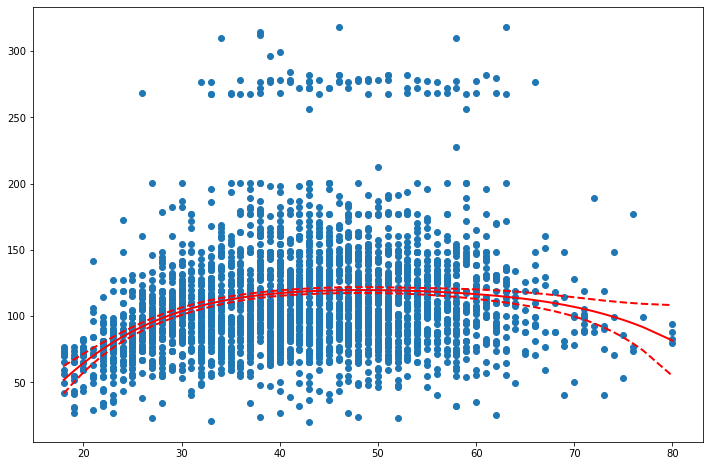

In [22]:
plt.figure(figsize = (12,8))
plt.scatter(x_o, Y[order])
plt.plot(x_o, fitted_values[order], 'r', lw = 2)
plt.plot(x_o, predict_mean_ci_low[order], 'r--', lw = 2)
plt.plot(x_o, predict_mean_ci_up[order], 'r--', lw = 2)

In [23]:
# Which features are necessary

smf.ols('wage~age + np.power(age, 2) + np.power(age, 3)+ np.power(age, 4)', data = wage).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           2.77e-57
Time:                        11:53:57   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
from statsmodels.stats.api import anova_lm

##### Use ANOVA to test whether addition of each polynomial terms are significant

Models have to be nested. Model 2 has to be a superset of Model 1

In [25]:
mod1 = smf.ols('wage~age', data = wage).fit()
mod2 = smf.ols('wage~age + np.power(age, 2)', data = wage).fit()
mod3 = smf.ols('wage~age + np.power(age, 2) + np.power(age, 3)', data = wage).fit()
mod4 = smf.ols('wage~age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data = wage).fit()
mod5 = smf.ols('wage~age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4) + np.power(age, 5)', data = wage).fit()

In [26]:
anova_lm(mod1, mod2, mod3, mod4, mod5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


In [27]:
wage['wage_250'] = np.where(wage['wage']>250, 1, 0)
wage['wage_250'].value_counts()

0    2921
1      79
Name: wage_250, dtype: int64

In [28]:
results = smf.logit('wage_250 ~ age + np.power(age, 2) + np.power(age, 3) + np.power(age, 4)', data = wage).fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                 0.04013
Time:                        11:53:57   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
Covariance Type:            nonrobust   LLR p-value:                 6.747e-06
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age                  8.9950      4.187      2.148      0.032       0.789      17.201
np.power(age, 2)    -0.2816      0.135     -2.081      0.037      -0.547      -0.016
np.power(age, 3)     0.0039      0.002      2.022      0.043       0.000       0.008
np.power(age, 4) -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
====================================================================================
"""

In [ ]:
X_new = np.array([1.000000e+00, 1.800000e+01, 3.240000e+02, 5.832000e+03,1.049760e+05])
results.predict(X_new)

In [29]:
yhat = np.exp(results.fittedvalues)
y = wage['wage_250'].values
x = wage['age'].values
x_mean = x.mean()
n= len(y)

In [30]:
sy = np.sqrt(np.sum((y - yhat)**2)/(n-2))
sx = np.sum((x-x_mean)**2)/n
x_s = (x-x_mean)**2

ERROR! Session/line number was not unique in database. History logging moved to new session 146


In [31]:
sx = np.sum(x**2) - (x.sum()**2)/n

In [32]:
err = sy * np.sqrt(1/n + x_s / x_s.sum())

In [33]:
order = np.argsort(x)
x_o = x[order]

(0.0, 0.07)

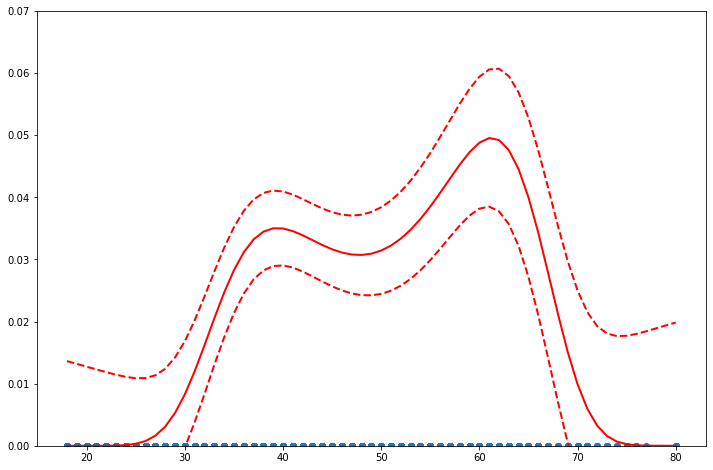

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(x_o, y[order])
plt.plot(x_o, yhat[order],'r', lw=2)
plt.plot(x_o, yhat[order] - 2*err[order], 'r--', lw = 2)
plt.plot(x_o, yhat[order] + 2*err[order], 'r--', lw = 2)
plt.ylim(0,0.07)

In [35]:
wage['yhat'] = results.predict()
wage[['yhat', 'wage_250']]

,yhat,wage_250
0,9.826349e-09,0
1,1.200776e-04,0
2,3.066351e-02,0
3,3.203914e-02,0
4,3.046630e-02,0
...,...,...
2995,3.130812e-02,0
2996,8.204860e-03,0
2997,1.626169e-03,0
2998,1.626169e-03,0


### Step Functions

In [36]:
results = smf.ols('wage~pd.cut(age,4)', data = wage).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.13e-41
Time:                        11:53:58   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 94.1584      1.476     63.790      0.000      91.264      97.053
pd.cut(age, 4)[T.Interval(33.5, 49.0, closed='right')]    24.0535      1.829     13.148      0.000      20.466      27.641
pd.cut(age, 4)[T.Interval(49.0, 64.5, closed='right')]    23.6646      2.068     11.443      0.000      19.610      27.719
pd.cut(age, 4)[T.Interval(64.5, 80.0, closed='right')]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
st, data, ss2 = summary_table(results, alpha = 0.05)
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,75.0431540173515,94.15839203351902,1.476068919973891,91.26418087707798,97.05260318996007,14.844331982548837,173.4724520844892,-19.115238016167524,40.39685399790627,-0.4731863034967586,7.47347389242077e-05
2.0,70.47601964694451,94.15839203351902,1.4760689199738897,91.26418087707799,97.05260318996005,14.844331982548837,173.4724520844892,-23.682372386574514,40.39685399790627,-0.5862429878277637,0.00011471323123405291
3.0,130.982177377461,118.2118834144282,1.0807578789169565,116.09278079784555,120.33098603101085,38.922323827743355,197.50144300111305,12.770293963032799,40.4093622170881,0.31602315063593267,1.7859555031806403e-05
4.0,154.68529299563,118.2118834144282,1.0807578789169565,116.09278079784555,120.33098603101085,38.922323827743355,197.50144300111305,36.47340958120179,40.4093622170881,0.9025980015536623,0.00014568725901442512
5.0,75.0431540173515,117.82295103283136,1.4483333755058592,114.98312251472319,120.66277955093952,38.51085681282542,197.1350452528373,-42.77979701547986,40.39785789887955,-1.0589620153267179,0.00036034722040643443
6.0,127.115743812184,117.82295103283136,1.4483333755058592,114.98312251472319,120.66277955093952,38.51085681282542,197.1350452528373,9.292792779352638,40.39785789887955,0.2300318200686175,1.7003418458894864e-05
7.0,169.528538036679,118.2118834144282,1.0807578789169565,116.09278079784555,120.33098603101085,38.922323827743355,197.50144300111305,51.31665462225081,40.4093622170881,1.269919934557895,0.0002883935336529916
8.0,111.720849360989,94.15839203351902,1.4760689199738928,91.26418087707798,97.05260318996007,14.844331982548837,173.4724520844892,17.562457327469986,40.39685399790627,0.43474814470404627,6.308609790507696e-05
9.0,118.884359339886,118.2118834144282,1.0807578789169565,116.09278079784555,120.33098603101085,38.922323827743355,197.50144300111305,0.6724759254578032,40.4093622170881,0.01664158721053583,4.952475409260905e-08


In [38]:
results =smf.logit('wage_250 ~ age', data = wage).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.119871
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2998
Method:                           MLE   Df Model:                            1
Date:                Mon, 05 Sep 2022   Pseudo R-squ.:                 0.01548
Time:                        11:53:59   Log-Likelihood:                -359.61
converged:                       True   LL-Null:                       -365.27
Covariance Type:            nonrobust   LLR p-value:                 0.0007726
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.0772      0.471    -10.773      0.000      -6.001      -4.154
age            0.0330      0.010      3.360      0.001       0.014       0.052
==============================================================================
"""

### Splines

In [39]:
import scipy.interpolate as si

In [40]:
y = wage['wage'].values

In [41]:
x_sort = x[order]
y_sort = y[order]
t = np.array([25,40,60])

In [42]:
spl = si.LSQUnivariateSpline(x_sort, y_sort, t)

In [43]:
spl(x_sort)

array([60.49371419, 60.49371419, 60.49371419, ..., 77.09985645,
       77.09985645, 77.09985645])

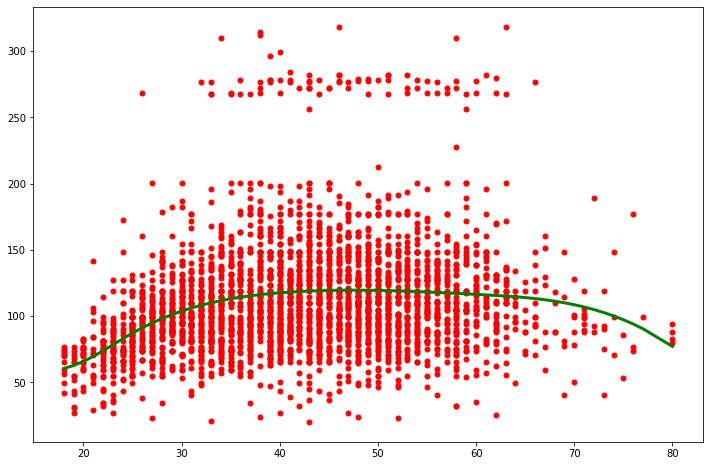

In [44]:
plt.figure(figsize =(12,8))
plt.plot(x_sort, y_sort, 'ro', ms = 5)
plt.plot(x_sort, spl(x_sort), 'g-', lw = 3)

100
100
33
133


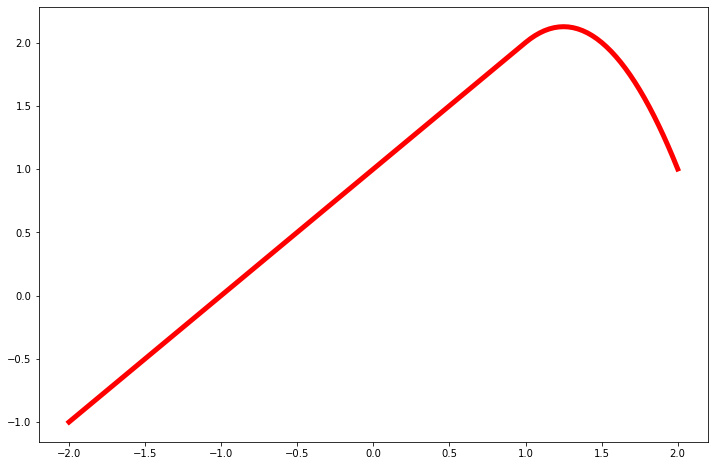

In [45]:
x = list(np.linspace(-2,1,100))
print(len(x))
y = list(map(lambda x:1+x, x))
print(len(y))
x_extend = list(np.linspace(1,2,33))
print(len(x_extend))
x.extend(x_extend)
print(len(x))
y.extend(list(map(lambda x: 1 + x - 2*(x-1)**2, x_extend)))
len(y)
plt.figure(figsize = (12,8))
plt.plot(x,y, 'r-', lw = 5)

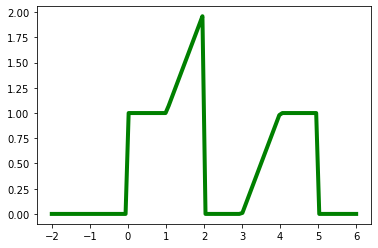

In [46]:
x = np.linspace(-2,6,100)
y = ((x <= 2) & (0 <= x)) + (x-1)*((x <= 2) & (1 <= x))+ (x-3)*((x <= 4) & (3 <= x)) + ((x <= 5) & (4 < x))
plt.plot(x, y, 'g-', lw = 4)

##### Exercises

###### 6

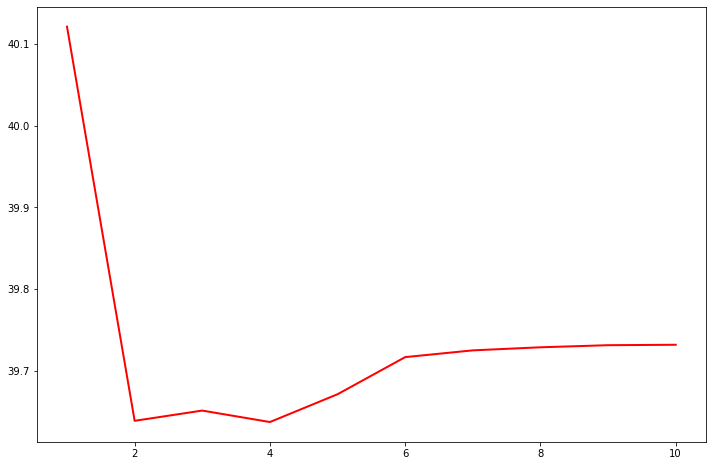

In [47]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


x_train, x_test, y_train , y_test = train_test_split(wage['age'], wage['wage'])
errors = []
lr = LinearRegression()


for d in range(1,11):
    poly = PolynomialFeatures(d)
    x = poly.fit_transform(np.array(x_train).reshape(-1,1))
    y = y_train
    lr.fit(x,y)
    errors.append(np.sqrt(np.mean((lr.predict(poly.fit_transform(np.array(x_test).reshape(-1,1)))- y_test)**2)))

plt.figure(figsize = (12,8))
plt.plot (range(1,11), errors, 'r-', lw = 2)
    

In [48]:
from statsmodels.stats.api import anova_lm

mod1 = smf.ols('wage~age', data = wage).fit()
mod2 = smf.ols('wage~age + np.power(age,2)', data = wage).fit()
mod3 = smf.ols('wage~age + np.power(age,2) + np.power(age,3)', data = wage).fit()
mod4 = smf.ols('wage~age + np.power(age,2) + np.power(age,3) + np.power(age,4)', data = wage).fit()
mod5 = smf.ols('wage~age + np.power(age,2) + np.power(age,3) + np.power(age,4) + np.power(age,5)', data = wage).fit()
mod6 = smf.ols('wage~age + np.power(age,2) + np.power(age,3) + np.power(age,4) + np.power(age,5) + np.power(age,6)', data = wage).fit()

anova_lm(mod1,mod2,mod3,mod4,mod5,mod6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.663571,2.285169e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.893609,1.674794e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.811683,5.098933e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.805371,3.695646e-01
5,2993.0,4.766389e+06,1.0,3932.257650,2.469216,1.162015e-01


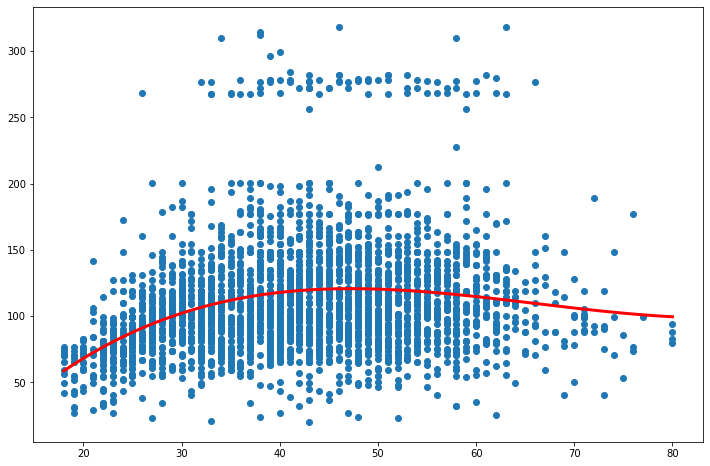

In [49]:
plt.figure(figsize = (12,8))
plt.scatter(wage['age'], wage['wage'])
x = np.linspace(wage['age'].min(), wage['age'].max(), 1000)
poly = PolynomialFeatures(3)
y = wage['wage']
lr.fit(poly.fit_transform(np.array(wage['age']).reshape(-1,1)), y)
plt.plot(x,lr.predict(poly.fit_transform(x.reshape(-1,1))), 'r-', lw = 3)

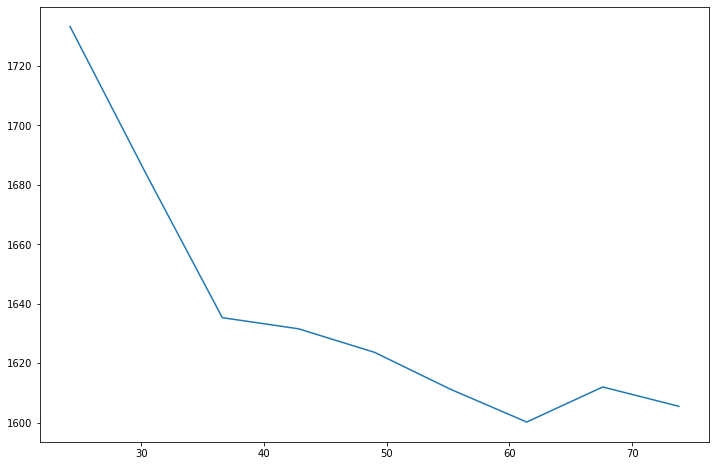

In [61]:
import sklearn.model_selection as model_selection

x = wage[['age']]
y = wage['wage']

final_scores = []

for d in range(3,12):
    t = np.linspace(wage['age'].min(),wage['age'].max(),d)
    x_new = pd.get_dummies(pd.cut(x['age'], t, include_lowest = True)).values
    scores = model_selection.cross_val_score(lr, x_new, y, cv = 10, scoring = 'neg_mean_squared_error')
    final_scores.append(-np.mean(scores))

plt.figure(figsize = (12,8))
plt.plot(t[1:-1], final_scores)

[112.92911462 111.98616847 112.56984376 109.30755501 112.06645381
 115.64671109 100.46803753 115.5511066 ]


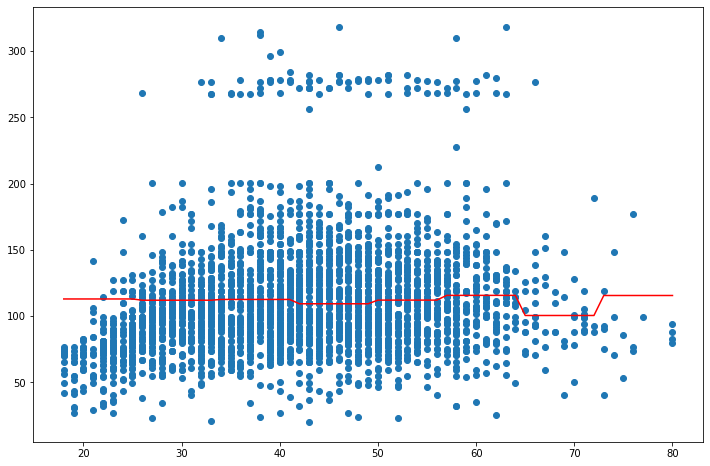

In [81]:
t = np.linspace(wage['age'].min(),wage['age'].max(),9)
order = np.argsort(x['age'])
x_new = pd.get_dummies(pd.cut(x['age'], t, include_lowest = True)).values[order]
lr.fit(x_new, y)
print(lr.coef_)
plt.figure(figsize = (12,8))
plt.scatter(x, y)
plt.plot(x['age'].values[order],lr.predict(x_new),c = 'r')

###### 7

In [114]:
wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   sex         3000 non-null   object 
 3   maritl      3000 non-null   object 
 4   race        3000 non-null   object 
 5   education   3000 non-null   object 
 6   region      3000 non-null   object 
 7   jobclass    3000 non-null   object 
 8   health      3000 non-null   object 
 9   health_ins  3000 non-null   object 
 10  logwage     3000 non-null   float64
 11  wage        3000 non-null   float64
 12  wage_250    3000 non-null   int64  
 13  yhat        3000 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 328.2+ KB


In [130]:
headless = wage[ (wage['maritl'] == '1. Never Married') & (wage['jobclass'] == '1. Industrial')][['region']]
headless.head()

,region
0,2. Middle Atlantic
16,2. Middle Atlantic
19,2. Middle Atlantic
24,2. Middle Atlantic
29,2. Middle Atlantic


In [131]:
X = pd.get_dummies(wage[['maritl', 'jobclass']], drop_first = False)
y = wage['wage']

In [132]:
X.head()

,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,jobclass_1. Industrial,jobclass_2. Information
0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0
3,0,1,0,0,0,0,1
4,0,0,0,1,0,0,1


In [135]:
lr = LinearRegression(fit_intercept = True)
lr.fit(X,y)

LinearRegression()

In [136]:
lr.coef_

array([ 7.87717109e+14,  7.87717109e+14,  7.87717109e+14,  7.87717109e+14,
        7.87717109e+14, -2.74872659e+13, -2.74872659e+13])

In [158]:
X = pd.get_dummies(wage['maritl']+' '+wage['jobclass'])
y= wage['wage']

In [159]:
import statsmodels.api as sm

results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     40.91
Date:                Mon, 05 Sep 2022   Prob (F-statistic):           1.97e-69
Time:                        14:10:47   Log-Likelihood:                -15276.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2990   BIC:                         3.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
1. Never Married 1. Industrial     84.6314      2.087     40.551      0.000      80.539      88.724
1. Never Married 2. Information   102.6758      2.312     44.417      0.000      98.143     107.208
2. Married 1. Industrial          110.5215      1.219     90.645      0.000     108.131     112.912
2. Married 2. Information         127.3450      1.230    103.541      0.000     124.933     129.757
3. Widowed 1. Industrial          100.9559     11.384      8.869      0.000      78.636     123.276
3. Widowed 2. Information          97.1091     14.905      6.515      0.000      67.885     126.333
4. Divorced 1. Industrial          96.1082      3.886     24.735      0.000      88.490     103.727
4. Divorced 2. Information        110.3500      3.924     28.123      0.000     102.656     118.044
5. Separated 1. Industrial         99.9341      7.734     12.922      0.000      84.770     115.098
5. Separated 2. Information       102.3649      7.323     13.979      0.000      88.007     116.723
==============================================================================
Omnibus:                     1050.722   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4572.814
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [160]:
results.predict([0,0,0,0,0,0,0,1,0,0])

array([110.3499553])

###### 9

In [167]:
boston = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/boston.csv")
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [173]:
X = boston[['dis']]
poly = PolynomialFeatures(degree = 3)
x = poly.fit_transform(X)
y = boston['nox']
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    nox   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     419.3
Date:                Mon, 05 Sep 2022   Prob (F-statistic):          2.71e-136
Time:                        14:37:02   Log-Likelihood:                 690.44
No. Observations:                 506   AIC:                            -1373.
Df Residuals:                     502   BIC:                            -1356.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9341      0.021     45.110      0.000       0.893       0.975
x1            -0.1821      0.015    -12.389      0.000      -0.211      -0.153
x2             0.0219      0.003      7.476      0.000       0.016       0.028
x3            -0.0009      0.000     -5.124      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       64.176   Durbin-Watson:                   0.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.386
Skew:                           0.917   Prob(JB):                     1.06e-19
Kurtosis:                       3.886   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

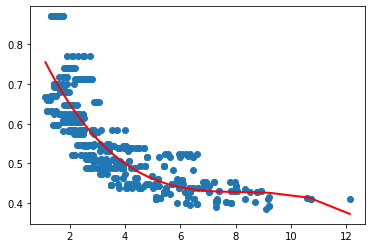

In [190]:
plt.scatter(X,y)
order = np.argsort(boston['dis'])
plt.plot(X.values[order], results.predict(x[order]), 'r-', lw = 2)

In [191]:
final_scores = []

for d in range(1,11):
    poly = PolynomialFeatures(d)
    x = poly.fit_transform(X)
    scores = model_selection.cross_val_score(lr,x,y,cv=10, scoring = 'neg_mean_squared_error')
    final_scores.append(-np.mean(scores))
    
final_scores

[0.006100015964224094,
 0.004436912163053275,
 0.004222893611150224,
 0.005732179720095533,
 0.013494637604215376,
 0.10566984767877168,
 0.19954417076675401,
 1.5325679098954956,
 0.6396993883132767,
 41.31623984604373]

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train, X_test, y_train, y_test
final_errors = []

for d in range(3,12):
    t = np.linspace(X.min(), X.max(),d)
    print(t[1:-1])
    spl = si.LSQUnivariateSpline(X_train, y_train, list(t[1:-1]))
    errors = np.mean(np.sum(y_test - spl(x_test))**2)
    final_errors.append(errors)

final_errors

[[6.62805]]


ValueError: Interior knots t must satisfy Schoenberg-Whitney conditions

In [213]:
t = np.linspace(X.min(), X.max(),3)
t[1:-1]

array([[6.62805]])

In [218]:
newlist = [3,4,5]
3,4 in newlist

(3, True)